# Importing the Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the Dataset

In [2]:
data = pd.read_csv('Fish_train.csv',sep=',', squeeze=False,)

# Understanding Data

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
dataset = data.copy()
dataset.shape

(159, 7)

In [5]:
dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
dataset.describe(include= 'O')

,Species
count,159
unique,7
top,Perch
freq,56


In [7]:
dataset.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

# Checking Null Values In Dataset

In [8]:
dataset.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

There is no any null values so we need not worry about null values handling 

# Visualize

<AxesSubplot:>

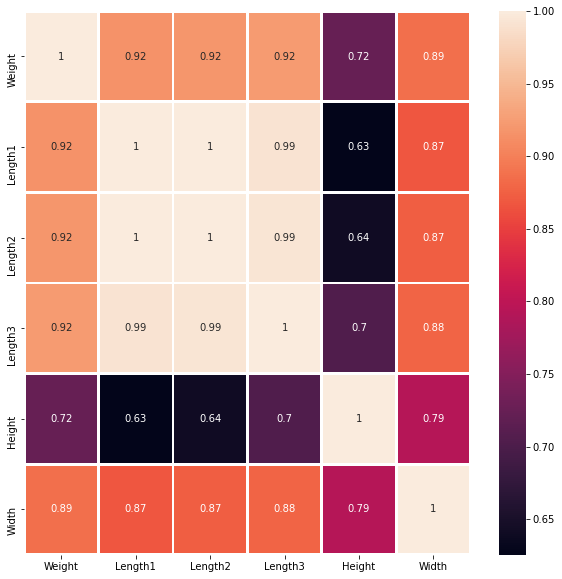

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, linewidths=2)

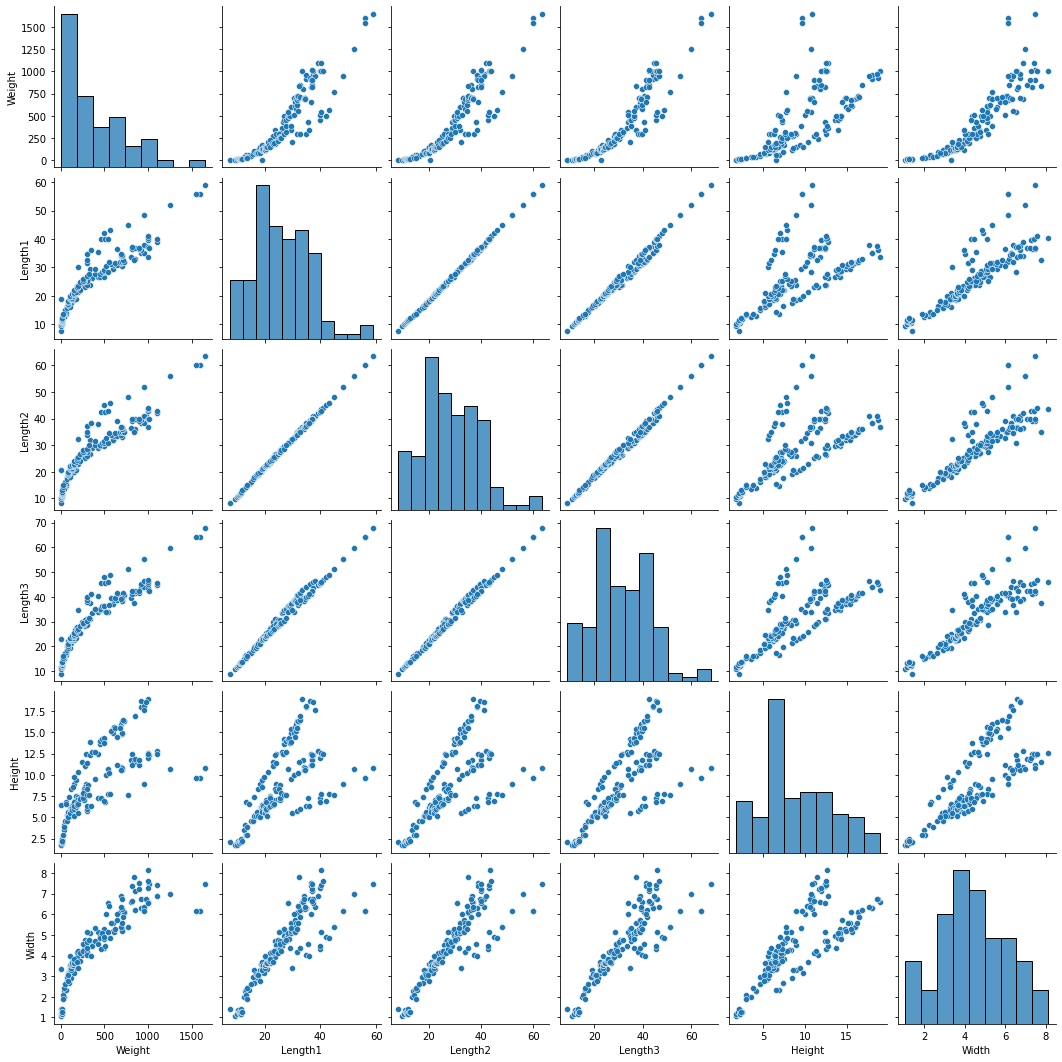

In [10]:
sns.pairplot(dataset)


# Handling the Categorical Features


Using simple get_dummies method

In [11]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [12]:
# To prevent the dummy variable trap 
dataset.drop(['Whitefish'], axis=1, inplace=True)

In [13]:
dataset.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0


Visualize :::: Either it follows normal Distributions or not

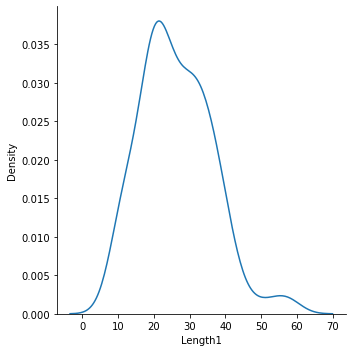

In [14]:
sns.displot(dataset.iloc[:, 1], kind = 'kde')

<AxesSubplot:xlabel='Height', ylabel='Count'>

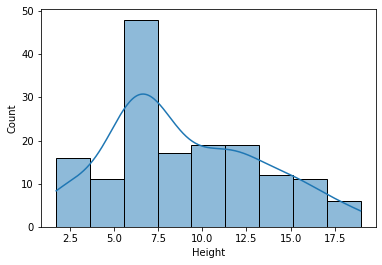

In [15]:
sns.histplot(dataset.iloc[:, 4], kde = True)

<AxesSubplot:xlabel='Width', ylabel='Count'>

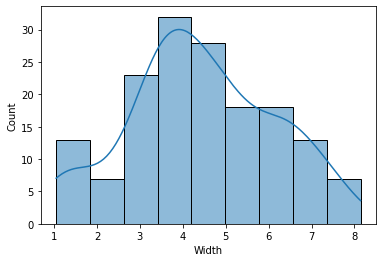

In [16]:
sns.histplot(dataset['Width'], kde = True)

# Detect Outlier  Using Boxplot

C:\Users\97798\anaconda\envs\Deep Learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Weight'>

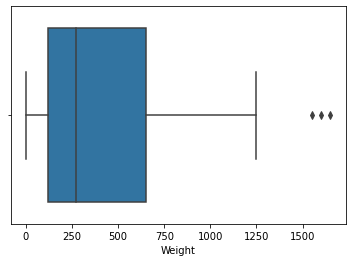

In [17]:
# Sample 
sns.boxplot(dataset['Weight'])

Removing the Outliers


In [18]:
import numpy as np
def removing_outlier_IQR(data,feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 -Q1
    lower_bound = Q1 - IQR *1.5
    upper_bound =  Q3 + IQR *1.5
    dataset = data[((data[feature] > lower_bound) & (data[feature] < upper_bound))]
    return dataset

In [19]:
dataset = removing_outlier_IQR(dataset, "Weight")
dataset.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0


C:\Users\97798\anaconda\envs\Deep Learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Weight'>

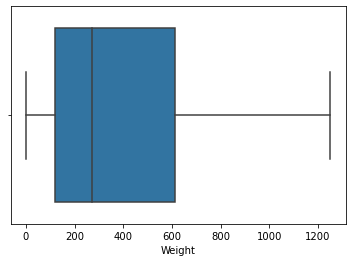

In [20]:
sns.boxplot(dataset['Weight'])

In [21]:
columns = dataset.columns[:-6]
columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [22]:
for feature in columns:
    dataset = removing_outlier_IQR(dataset, feature)
    

In [23]:
dataset.shape

(155, 12)

In [24]:
dataset.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0



# Standerlized

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
stander = MinMaxScaler()
dataset = pd.DataFrame(stander.fit_transform(dataset), columns= dataset.columns)
dataset.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,0.220000,0.384804,0.392610,0.457883,0.568334,0.418978,1.0,0.0,0.0,0.0,0.0,0.0
1,0.263636,0.404412,0.413395,0.483801,0.624055,0.459235,1.0,0.0,0.0,0.0,0.0,0.0
2,0.309091,0.401961,0.418014,0.481641,0.618123,0.514279,1.0,0.0,0.0,0.0,0.0,0.0
3,0.330000,0.460784,0.475751,0.533477,0.638566,0.480365,1.0,0.0,0.0,0.0,0.0,0.0
4,0.390909,0.465686,0.475751,0.544276,0.621966,0.576004,1.0,0.0,0.0,0.0,0.0,0.0



# splitting the dataset

In [27]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [28]:
x_train = train_dataset.copy()
x_test = test_dataset.copy()

y_train = x_train.pop('Weight')
y_test = x_test.pop('Weight')

In [29]:
x_train.head()

,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
26,0.600490,0.614319,0.686825,0.849367,0.710758,1.0,0.0,0.0,0.0,0.0,0.0
90,0.306373,0.314088,0.317495,0.220221,0.415454,0.0,0.0,1.0,0.0,0.0,0.0
152,0.112745,0.106236,0.107991,0.031842,0.029347,0.0,0.0,0.0,0.0,0.0,1.0
111,0.612745,0.614319,0.615551,0.566500,0.951187,0.0,0.0,1.0,0.0,0.0,0.0
24,0.598039,0.614319,0.684665,0.842326,0.640139,1.0,0.0,0.0,0.0,0.0,0.0




# model


In [30]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [31]:
predicted_weight = regression.predict(x_test)
predicted_weight[:10]

array([ 0.46773014,  0.6015575 ,  0.65207868,  0.80455751,  0.7814594 ,
        0.8450015 , -0.02282117,  0.07737353,  0.13341046,  0.38272967])

Evaluate model using r2_score

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, predicted_weight)

0.9137455581646202

In [33]:
 y_train[:10]

26     0.654545
90     0.100000
152    0.011091
111    0.763636
24     0.636364
7      0.354545
44     0.131818
106    0.227273
56     0.245455
118    0.745455
Name: Weight, dtype: float64

# Sample Visual Test 

In [34]:
train_pred = regression.predict(x_train)

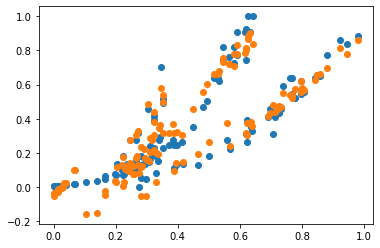

In [35]:
plt.scatter(x_train['Height'], y_train)
plt.scatter(x_train['Height'],train_pred)

In [36]:
x_train['Height'].shape, train_pred.shape

((124,), (124,))